In [1]:
library(readr)

In [2]:
df <- read_csv('datasetasig2.zip', col_types = cols_only(DayOfWeek = col_integer(), DayofMonth = col_integer(), Month = col_integer(), Cancelled = col_integer(), Year = col_integer(), FlightNum = col_integer(), Distance = col_double(), UniqueCarrier = col_character(), CancellationCode = col_character(), Origin = col_character(), Dest = col_character(), ArrDelay = col_integer(), DepDelay=col_integer(), CarrierDelay=col_integer(), WeatherDelay = col_integer(), NASDelay=col_integer(), SecurityDelay = col_integer(),  LateAircraftDelay=col_integer(), DepTime=col_integer()))

In [32]:
head(df)

Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
2008,1,3,4,2003,WN,335,-14,8,IAD,TPA,810,0,NA,NA,NA,NA,NA,NA
2008,1,3,4,754,WN,3231,2,19,IAD,TPA,810,0,NA,NA,NA,NA,NA,NA
2008,1,3,4,628,WN,448,14,8,IND,BWI,515,0,NA,NA,NA,NA,NA,NA
2008,1,3,4,926,WN,1746,-6,-4,IND,BWI,515,0,NA,NA,NA,NA,NA,NA
2008,1,3,4,1829,WN,3920,34,34,IND,BWI,515,0,NA,2,0,0,0,32
2008,1,3,4,1940,WN,378,11,25,IND,JAX,688,0,NA,NA,NA,NA,NA,NA


**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- **EV** 

In [3]:
needed <- df

library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [47]:
sort(table(df['UniqueCarrier']), decreasing=TRUE)[1:10]


     WN      AA      OO      MQ      US      DL      UA      XE      NW      CO 
1201754  604885  567159  490693  453589  451931  449515  374510  347652  298455 

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- **weather conditions**
- National Air System
- security reasons

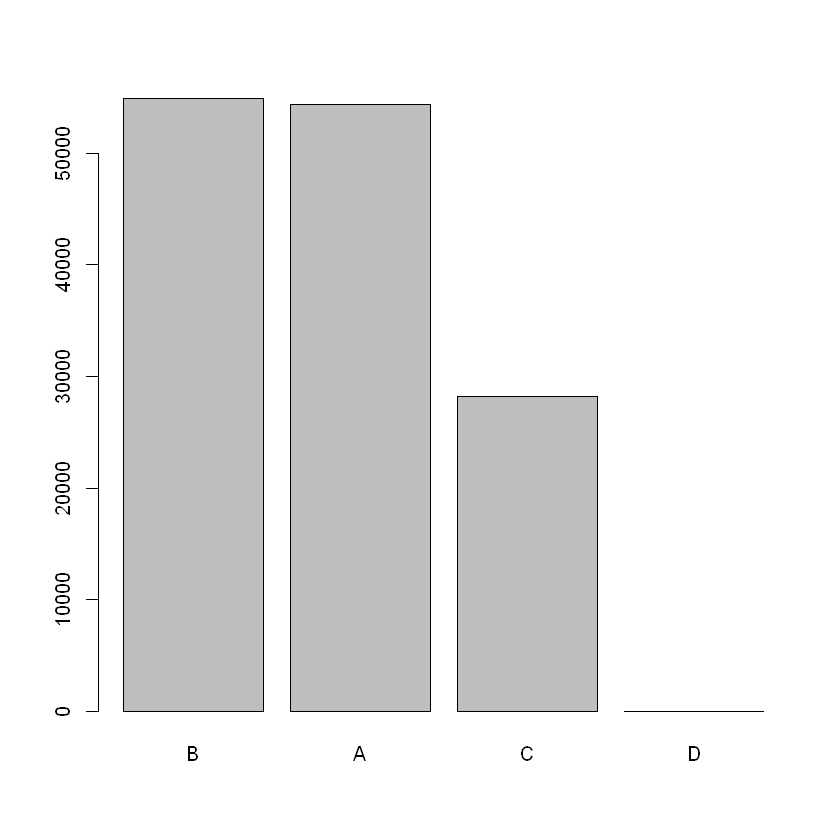

In [48]:
sorted = sort(table(df['CancellationCode']), decreasing=TRUE)
barplot(sorted)

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - **San-Francisco – Los-Angeles** 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [62]:
needed <- df
needed %>% group_by(Origin, Dest) %>% summarise(n=n()) %>% arrange(-n) %>% .[1,]


Origin,Dest,n
<chr>,<chr>,<int>
SFO,LAX,13788


**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- **668** 

In [129]:
needed <- df
filter(needed, DepDelay>0) %>% group_by(Origin, Dest) %>% summarize(n = n(), w = length(which(WeatherDelay > 0))) %>% arrange(-n) %>% .[1:5, 'w'] %>% sum()

[1] 668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - **In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.**

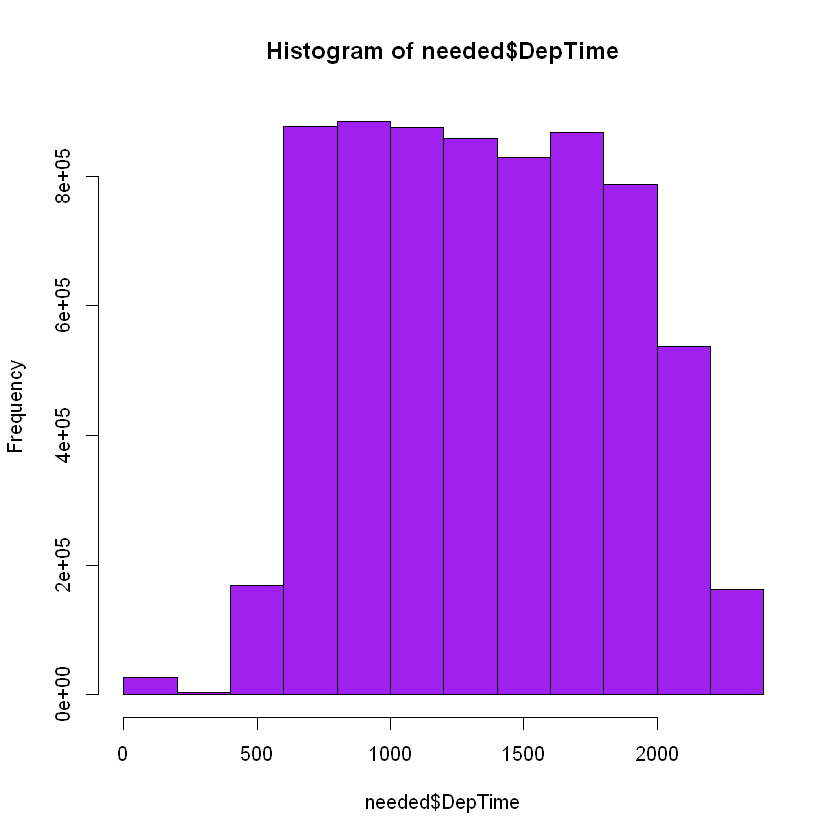

In [138]:
needed = df[!is.na(df['DepTime']), 'DepTime']
hist(needed$DepTime, breaks = 10, col='purple')

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- **The number of flights during weekends is less than during weekdays (working days).**
- The lowest number of flights is on Sunday.
- **There are less flights during winter than during summer.**  

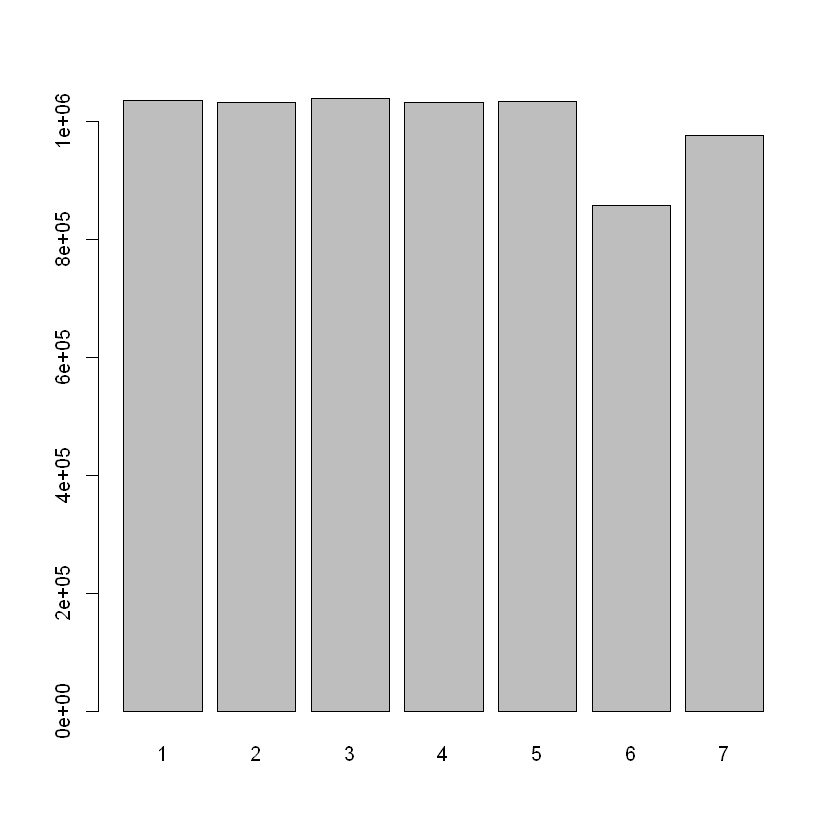

In [4]:
barplot(table(df['DayOfWeek']))

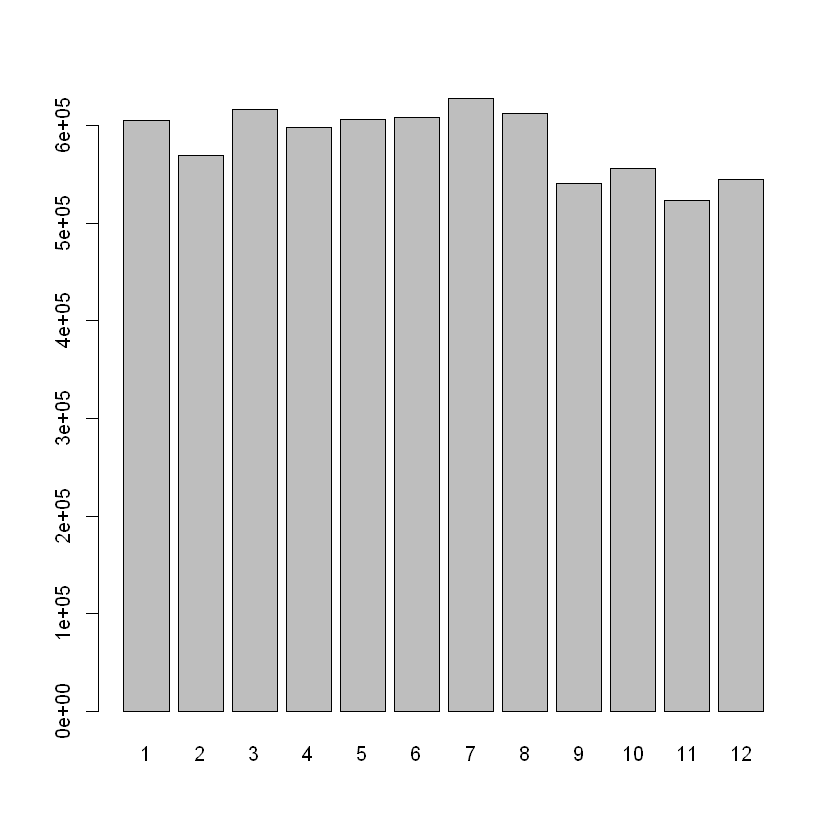

In [5]:
barplot(table(df['Month']))

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- **December has the highest rate of cancellations due to weather.** 
- The highest rate of cancellations in September is due to Security reasons.
- **April's top cancellation reason is carriers.**
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [11]:
use <- df %>% filter(!is.na(CancellationCode)) %>% group_by(CancellationCode, Month) %>% summarize(n = n()) %>% arrange(-n)
use

CancellationCode,Month,n
<chr>,<int>,<int>
B,12,10042
B,2,10034
B,3,7520
A,4,7312
B,1,6711
A,1,6635
B,9,6478
A,2,6090
A,3,6038


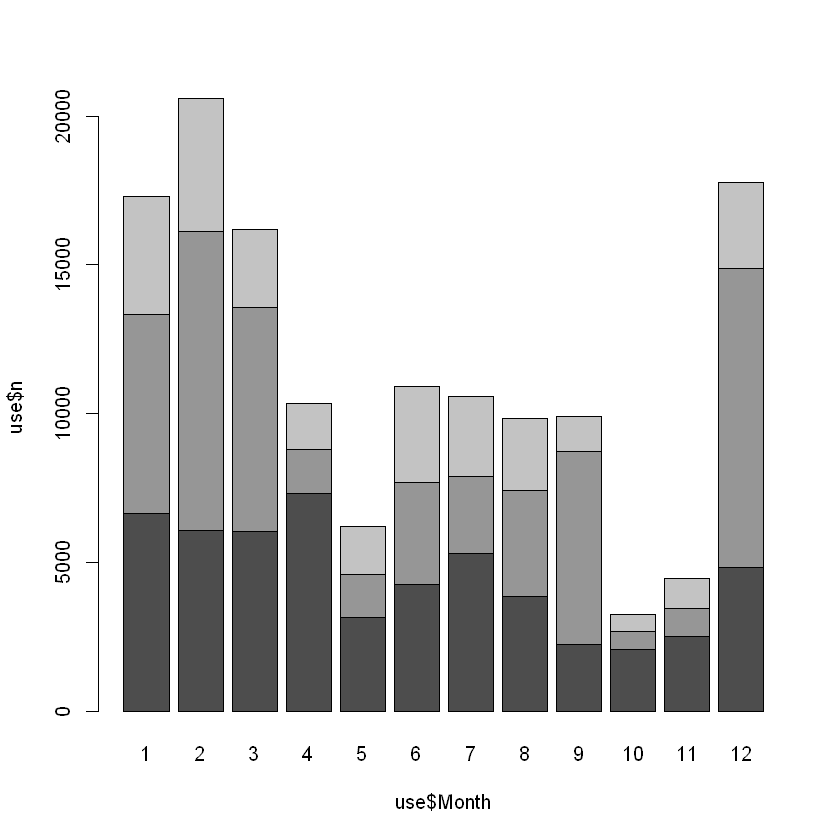

In [14]:
barplot(formula = use$n ~ use$CancellationCode + use$Month)

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- **April**

In [9]:
needed <- filter(df, CancellationCode == 'A')
needed %>% group_by(Month, CancellationCode) %>% summarize(n = n()) %>% arrange(-n) %>% .[1,]

Month,CancellationCode,n
<int>,<chr>,<int>
4,A,7312


**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- **AA**

In [15]:
needed <- filter(df, Month == 4 & Cancelled == 1)
needed %>% group_by(UniqueCarrier) %>% summarize(n = n()) %>% arrange(-n) %>% .[1,]

UniqueCarrier,n
<chr>,<int>
AA,3918


**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- **AQ** 

In [7]:
df %>% filter(ArrDelay > 0) %>% group_by(UniqueCarrier) %>% summarize(n = median(ArrDelay)) %>% arrange(n) %>% .[1, ]

UniqueCarrier,n
<chr>,<dbl>
AQ,5


In [8]:
df %>% filter(DepDelay > 0) %>% group_by(UniqueCarrier) %>% summarize(n = median(DepDelay)) %>% arrange(n) %>% .[1, ]

UniqueCarrier,n
<chr>,<dbl>
AQ,7
